In [1]:
#kütüphane ekleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score

# VERİ ÖN İŞLEME

In [2]:
#veri yükleme
data=pd.read_csv("C:/Users/bedir/Downloads/veriler.csv")
data_eksik=pd.read_csv("C:/Users/bedir/Downloads/eksikveriler.csv")
boykilo=data[["boy","kilo"]]
data_eksik

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


In [3]:
#eksik verileri doldurma
imputer =SimpleImputer(missing_values=np.nan,strategy="mean")
yas=data_eksik.iloc[:,1:4].values
yas

array([[130.,  30.,  10.],
       [125.,  36.,  11.],
       [135.,  34.,  10.],
       [133.,  30.,   9.],
       [129.,  38.,  12.],
       [180.,  90.,  30.],
       [190.,  80.,  25.],
       [175.,  90.,  35.],
       [177.,  60.,  22.],
       [185., 105.,  33.],
       [165.,  55.,  27.],
       [155.,  50.,  44.],
       [160.,  58.,  nan],
       [162.,  59.,  41.],
       [167.,  62.,  55.],
       [174.,  70.,  47.],
       [193.,  90.,  nan],
       [187.,  80.,  27.],
       [183.,  88.,  28.],
       [159.,  40.,  29.],
       [164.,  66.,  32.],
       [166.,  56.,  42.]])

In [4]:
#eksik verileri doldurma
imputer=imputer.fit(yas[:,1:4])
yas[:,1:4]=imputer.transform(yas[:,1:4])
yas

array([[130.  ,  30.  ,  10.  ],
       [125.  ,  36.  ,  11.  ],
       [135.  ,  34.  ,  10.  ],
       [133.  ,  30.  ,   9.  ],
       [129.  ,  38.  ,  12.  ],
       [180.  ,  90.  ,  30.  ],
       [190.  ,  80.  ,  25.  ],
       [175.  ,  90.  ,  35.  ],
       [177.  ,  60.  ,  22.  ],
       [185.  , 105.  ,  33.  ],
       [165.  ,  55.  ,  27.  ],
       [155.  ,  50.  ,  44.  ],
       [160.  ,  58.  ,  28.45],
       [162.  ,  59.  ,  41.  ],
       [167.  ,  62.  ,  55.  ],
       [174.  ,  70.  ,  47.  ],
       [193.  ,  90.  ,  28.45],
       [187.  ,  80.  ,  27.  ],
       [183.  ,  88.  ,  28.  ],
       [159.  ,  40.  ,  29.  ],
       [164.  ,  66.  ,  32.  ],
       [166.  ,  56.  ,  42.  ]])

In [23]:
#kategotik veriyi dnüştürme onehotencoder
ulke=data_eksik.iloc[:,0:1].values
ulke


array([['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr']], dtype=object)

In [24]:
#kategotik veriyi dnüştürme onehotencoder
le=preprocessing.LabelEncoder()
ulke[:,0]=le.fit_transform(data_eksik.iloc[:,0])
ulke

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [25]:
#kategotik veriyi dnüştürme onehotencoder
ohe=preprocessing.OneHotEncoder()
ulke =ohe.fit_transform(ulke).toarray()
ulke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
#array to df
sonuc=pd.DataFrame(data=ulke,index=range(22),columns=["fr","tr","us"])
sonuc

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [28]:
#array to df
sonuc2=pd.DataFrame(data=yas,index=range(22),columns=["boy","kilo","yas"])
sonuc2

,boy,kilo,yas
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


In [29]:
#array to df
cinsiyet=data_eksik.iloc[:,-1].values
sonuc3=pd.DataFrame(data=cinsiyet,index=range(22),columns=["cinsiyet"])
sonuc3

,cinsiyet
0,e
1,e
2,k
3,k
4,e
5,e
6,e
7,e
8,k
9,e


In [47]:
#df leri birleştirme
s=pd.concat([sonuc,sonuc2],axis=1)
s

,fr,tr,us,boy,kilo,yas
0,0.0,1.0,0.0,130.0,30.0,10.00
1,0.0,1.0,0.0,125.0,36.0,11.00
2,0.0,1.0,0.0,135.0,34.0,10.00
3,0.0,1.0,0.0,133.0,30.0,9.00
4,0.0,1.0,0.0,129.0,38.0,12.00
5,0.0,1.0,0.0,180.0,90.0,30.00
6,0.0,1.0,0.0,190.0,80.0,25.00
7,0.0,1.0,0.0,175.0,90.0,35.00
8,0.0,1.0,0.0,177.0,60.0,22.00
9,0.0,0.0,1.0,185.0,105.0,33.00


In [49]:
#df leri birleştirme
s2=pd.concat([s,sonuc3],axis=1)
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130.0,30.0,10.00,e
1,0.0,1.0,0.0,125.0,36.0,11.00,e
2,0.0,1.0,0.0,135.0,34.0,10.00,k
3,0.0,1.0,0.0,133.0,30.0,9.00,k
4,0.0,1.0,0.0,129.0,38.0,12.00,e
5,0.0,1.0,0.0,180.0,90.0,30.00,e
6,0.0,1.0,0.0,190.0,80.0,25.00,e
7,0.0,1.0,0.0,175.0,90.0,35.00,e
8,0.0,1.0,0.0,177.0,60.0,22.00,k
9,0.0,0.0,1.0,185.0,105.0,33.00,e


In [50]:
#eğitim ve test verilerini ayırma
x_train,x_test,y_train,y_test=train_test_split(s,sonuc3,test_size=0.3,random_state=0)
x_train

,fr,tr,us,boy,kilo,yas
19,1.0,0.0,0.0,159.0,40.0,29.00
8,0.0,1.0,0.0,177.0,60.0,22.00
6,0.0,1.0,0.0,190.0,80.0,25.00
16,1.0,0.0,0.0,193.0,90.0,28.45
4,0.0,1.0,0.0,129.0,38.0,12.00
2,0.0,1.0,0.0,135.0,34.0,10.00
5,0.0,1.0,0.0,180.0,90.0,30.00
17,1.0,0.0,0.0,187.0,80.0,27.00
9,0.0,0.0,1.0,185.0,105.0,33.00
7,0.0,1.0,0.0,175.0,90.0,35.00


In [52]:
#eğitim ve test verilerini standartize etme
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
X_train

array([[ 1.41421356, -1.06904497, -0.39223227, -0.30980326, -1.02468704,
         0.39320572],
       [-0.70710678,  0.93541435, -0.39223227,  0.4868337 , -0.22206012,
        -0.28251606],
       [-0.70710678,  0.93541435, -0.39223227,  1.06218262,  0.58056681,
         0.00707899],
       [ 1.41421356, -1.06904497, -0.39223227,  1.19495545,  0.98188027,
         0.34011329],
       [-0.70710678,  0.93541435, -0.39223227, -1.63753154, -1.10494974,
        -1.24783288],
       [-0.70710678,  0.93541435, -0.39223227, -1.37198588, -1.26547512,
        -1.44089624],
       [-0.70710678,  0.93541435, -0.39223227,  0.61960653,  0.98188027,
         0.4897374 ],
       [ 1.41421356, -1.06904497, -0.39223227,  0.92940979,  0.58056681,
         0.20014235],
       [-0.70710678, -1.06904497,  2.54950976,  0.84089457,  1.58385047,
         0.77933245],
       [-0.70710678,  0.93541435, -0.39223227,  0.39831848,  0.98188027,
         0.97239581],
       [ 1.41421356, -1.06904497, -0.39223227,  0.

<span style="color:red;font-size:30pt">REGRESYON</span>

![Regresyon](tahmin.jpeg)

![tahmin](tahmin_dagılım.jpeg)

# DOĞRUSAL REGRESYON

In [73]:
#veri yükleme
data_satis=pd.read_csv("C:/Users/bedir/Downloads/satislar.csv")
data_satis

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


In [74]:
#veriyi ayırma
aylar=data_satis[["Aylar"]]
satislar=data_satis[["Satislar"]]


In [75]:
#eğitim ve test verilerini ayırma
x_train,x_test,y_train,y_test=train_test_split(aylar,satislar,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)


In [89]:
#linear regresyon yöntemi ile veriyi eğitme ve tahmin çıkarma
lr=LinearRegression()
lr.fit(x_train,y_train)
predict=lr.predict(x_test)
predict

array([[20037.99221485],
       [30157.58514891],
       [30157.58514891],
       [30880.41321563],
       [36663.03774938],
       [51119.59908376],
       [54733.73941736],
       [54733.73941736],
       [58347.87975095]])

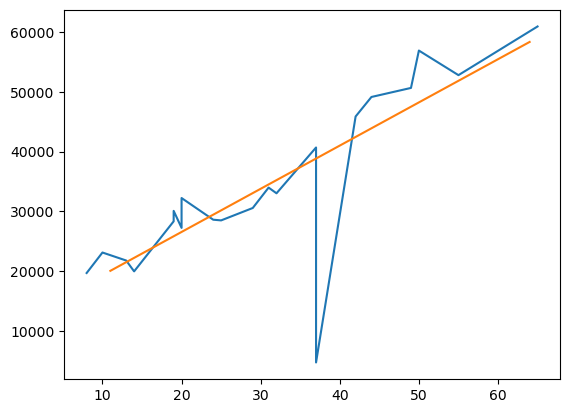

In [90]:
#tahmin ve gerçek değerlerin görselleştirimesi
x_train=x_train.sort_index()
y_train=y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,predict)
plt.show()

# ÇOKLU LİNEAR REGRESYON

In [3]:
data=pd.read_csv("C:/Users/bedir/Downloads/veriler.csv")

In [11]:
ulke=data.iloc[:,0:1].values
le=preprocessing.LabelEncoder()
ulke[:,0]=le.fit_transform(data.iloc[:,0])
ohe=preprocessing.OneHotEncoder()
ulke =ohe.fit_transform(ulke).toarray()
ulke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [17]:
yas=data.iloc[:,1:4].values
yas

array([[130,  30,  10],
       [125,  36,  11],
       [135,  34,  10],
       [133,  30,   9],
       [129,  38,  12],
       [180,  90,  30],
       [190,  80,  25],
       [175,  90,  35],
       [177,  60,  22],
       [185, 105,  33],
       [165,  55,  27],
       [155,  50,  44],
       [160,  58,  39],
       [162,  59,  41],
       [167,  62,  55],
       [174,  70,  47],
       [193,  90,  23],
       [187,  80,  27],
       [183,  88,  28],
       [159,  40,  29],
       [164,  66,  32],
       [166,  56,  42]], dtype=int64)

In [18]:
c=data.iloc[:,-1:].values
c[:,-1]=le.fit_transform(data.iloc[:,-1])
c=ohe.fit_transform(c).toarray()
c

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:
#kukla değişken tuzağına göre dataframee dönüştürme
sonuc=pd.DataFrame(data=ulke[:, :2],index=range(22),columns=["fr","tr"])
sonuc2=pd.DataFrame(data=yas,index=range(22),columns=["boy","kilo","yas"])
sonuc3=pd.DataFrame(data=c[:,:1],index=range(22),columns=["cinsiyet"])


In [24]:
#bağımsız değişkenleri birleştirme
s=pd.concat([sonuc,sonuc2],axis=1)
s


,fr,tr,boy,kilo,yas
0,0.0,1.0,130,30,10
1,0.0,1.0,125,36,11
2,0.0,1.0,135,34,10
3,0.0,1.0,133,30,9
4,0.0,1.0,129,38,12
5,0.0,1.0,180,90,30
6,0.0,1.0,190,80,25
7,0.0,1.0,175,90,35
8,0.0,1.0,177,60,22
9,0.0,0.0,185,105,33


In [25]:
#bağımlı değişkeni bağımsız değişkenlerle bir dataframede toplama
s2=pd.concat([s,sonuc3],axis=1)
s2

,fr,tr,boy,kilo,yas,cinsiyet
0,0.0,1.0,130,30,10,1.0
1,0.0,1.0,125,36,11,1.0
2,0.0,1.0,135,34,10,0.0
3,0.0,1.0,133,30,9,0.0
4,0.0,1.0,129,38,12,1.0
5,0.0,1.0,180,90,30,1.0
6,0.0,1.0,190,80,25,1.0
7,0.0,1.0,175,90,35,1.0
8,0.0,1.0,177,60,22,0.0
9,0.0,0.0,185,105,33,1.0


## CİNSİYET TAHMİNİ

In [27]:
x_train,x_test,y_train,y_test=train_test_split(s,sonuc3,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)

In [53]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
y_pred

array([[182.91324438],
       [153.08452404],
       [163.21358354],
       [158.62048862],
       [130.74347781],
       [174.74489477],
       [150.51276572]])

## BOY TAHMİNİ

In [64]:
boy=s2.iloc[:,2:3].values
sol=s2.iloc[:,:2]
sag=s2.iloc[:,3:]

veri=pd.concat([sol,sag],axis=1)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(veri,boy,test_size=0.3,random_state=0)


In [52]:
r2=LinearRegression()
r2.fit(x_train,y_train)

y_pred=r2.predict(x_test)
y_pred

array([[182.91324438],
       [153.08452404],
       [163.21358354],
       [158.62048862],
       [130.74347781],
       [174.74489477],
       [150.51276572]])

In [62]:
#geri eleme
import statsmodels.api as sm
X=np.append(arr=np.ones((22,1)).astype(int),values=veri,axis=1)
xl =veri.iloc[:, [0, 1, 2, 3, 4]].values
xl=np.array(xl,dtype=float)
model=sm.OLS(boy,xl).fit()
y=model.summary()
y

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              205.5
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    1.41e-14
Time:                        20:01:20   Log-Likelihood:                         -98.202
No. Observations:                  22   AIC:                                      206.4
Df Residuals:                      17   BIC:                                      211.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            36.4596     12.959      2.813      0.012       9.119      63.801
x2            61.3961     11.634      5.277      0.000      36.851      85.942
x3             1.4074      0.325      4.336      0.000       0.723       2.092
x4             1.6130      0.510      3.163      0.006       0.537       2.689
x5           -21.6517     14.483     -1.495      0.153     -52.209       8.905
==============================================================================
Omnibus:                        2.761   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                1.461
Skew:                          -0.611   Prob(JB):                        0.482
Kurtosis:                       3.316   Cond. No.                         234.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#geri eleme
import statsmodels.api as sm
X=np.append(arr=np.ones((22,1)).astype(int),values=veri,axis=1)
xl =veri.iloc[:, [0, 1, 2, 3]].values
xl=np.array(xl,dtype=float)
model=sm.OLS(boy,xl).fit()
y=model.summary()
y

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              239.9
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    2.39e-15
Time:                        20:03:59   Log-Likelihood:                         -99.561
No. Observations:                  22   AIC:                                      207.1
Df Residuals:                      18   BIC:                                      211.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            33.1218     13.196      2.510      0.022       5.398      60.845
x2            56.6567     11.571      4.896      0.000      32.346      80.967
x3             1.0993      0.259      4.241      0.000       0.555       1.644
x4             1.9978      0.455      4.390      0.000       1.042       2.954
==============================================================================
Omnibus:                        3.098   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.550
Skew:                          -0.594   Prob(JB):                        0.461
Kurtosis:                       3.526   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#çıkan sonuca göre tekrar regresyon
boy=s2.iloc[:,2:3].values
sol=s2.iloc[:,:2]
sag=s2.iloc[:,3:5]

veri=pd.concat([sol,sag],axis=1)
veri

,fr,tr,kilo,yas
0,0.0,1.0,30,10
1,0.0,1.0,36,11
2,0.0,1.0,34,10
3,0.0,1.0,30,9
4,0.0,1.0,38,12
5,0.0,1.0,90,30
6,0.0,1.0,80,25
7,0.0,1.0,90,35
8,0.0,1.0,60,22
9,0.0,0.0,105,33


In [69]:
x_train,x_test,y_train,y_test=train_test_split(veri,boy,test_size=0.3,random_state=0)


In [70]:
r2=LinearRegression()
r2.fit(x_train,y_train)

y_pred=r2.predict(x_test)
y_pred

array([[173.76529805],
       [150.70498611],
       [161.99135786],
       [156.72275449],
       [139.01379545],
       [168.43158245],
       [150.62764974]])

 # POLİNOMAL REGRESYON


In [14]:
data=pd.read_csv("C:/Users/bedir/Downloads/maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [15]:
x=data.iloc[:,1:2]
y=data.iloc[:,2:]
X=x.values
Y=y.values

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=10)
x_poly=poly_reg.fit_transform(X)
x_poly


array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02, 5.12000000e+02, 1.02400000e+03],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03,
        6.56100000e+03, 1.96830000e+04, 5.90490000e+04],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+06],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04,
        3.90625000e+05, 1.95312500e+06, 9.76562500e+

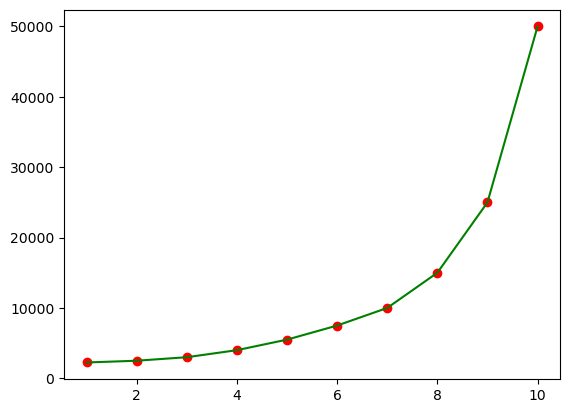

In [17]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg.predict(x_poly),color="green")
plt.show()


# DESTEKLENMİŞ VEKTÖR REGRESYONU

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X) 
X_test = sc.fit_transform(Y)

In [30]:
scl = StandardScaler()
x_olcekli = scl.fit_transform(X)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(Y)

C:\Users\bedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


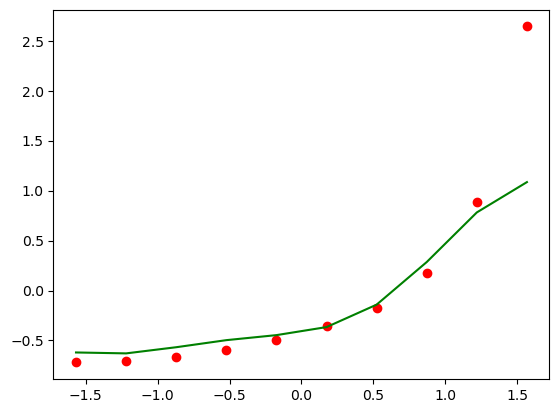

In [31]:
from sklearn.svm import SVR

svr_reg = SVR(kernel = "rbf")
svr_reg.fit(x_olcekli,y_olcekli)
plt.scatter(x_olcekli,y_olcekli,color="red")
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color="green")
plt.show()

# KARAR AĞACI (DECİSİON TREE)

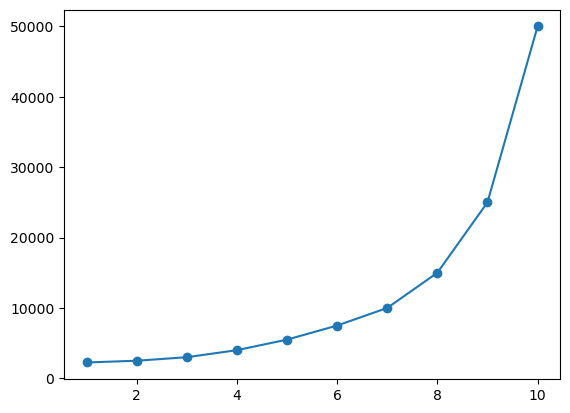

In [32]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

plt.scatter(X,Y)
plt.plot(X,r_dt.predict(X))
plt.show()

# RASSAL AĞAÇLAR (RANDOM FOREST)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(rf_reg.predict([[6.5]]))

[8350.]


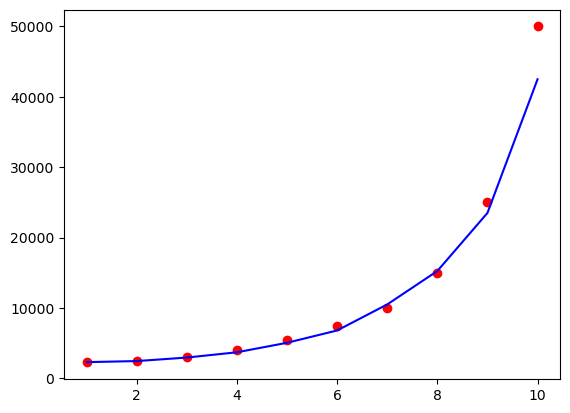

In [42]:
plt.scatter(X,Y,color="red")
plt.plot(X,rf_reg.predict(X),color="blue")
plt.show()

# R KARE

In [44]:
from sklearn.metrics import r2_score
print("Random Forest R2 degeri")
print(r2_score(Y, rf_reg.predict(X)))

Random Forest R2 degeri
0.9704434230386582


<span style="color:red;font-size:30pt">SINIFLANDIRMA</span>


![sınıflandırma](sınıflandırma.jpeg)

## LOJİSTİK REGRESYON

In [4]:
data=pd.read_csv("C:/Users/bedir/Downloads/veriler.csv")
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [37]:
# aykırı verileri çıkarttık
x=data.iloc[5:21,1:4]
y=data.iloc[5:21,4:]

In [34]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

sc=StandardScaler()

X_train = sc.fit_transform(x_train)

X_test = sc.transform(x_test)

In [35]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
y_pred

C:\Users\bedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['e', 'k', 'k', 'e', 'e', 'e'], dtype=object)

In [36]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred) 
cm

array([[3, 0],
       [1, 2]], dtype=int64)

## K EN YAKIN KOMŞU (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn. fit(X_train,y_train) 
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\bedir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[3, 0],
       [0, 3]], dtype=int64)

## SVM ve ÇEKİRDEK HİLESİ

In [40]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('svc')

print(cm)

svc
[[3 0]
 [1 2]]


C:\Users\bedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## NAİVE BAYES

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')

print(cm)

GNB
[[3 0]
 [1 2]]


C:\Users\bedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KARAR AĞACI 

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

print('DTC')

print(cm)

DTC
[[3 0]
 [0 3]]


# RASSAL AĞAÇLAR (RANDOM FOREST)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

print('RFC')

print(cm)

RFC
[[3 0]
 [0 3]]


C:\Users\bedir\AppData\Local\Temp\ipykernel_20652\3418377312.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


<span style="color:red;font-size:30pt">KÜMELENDİRME</span>

![kümelendirme](kumelendirme.jpeg)

# K MEAN

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
data=pd.read_csv("C:/Users/bedir/Downloads/musteriler.csv")
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [11]:
X=data.iloc[:,3:].values


In [15]:
from sklearn.cluster import KMeans


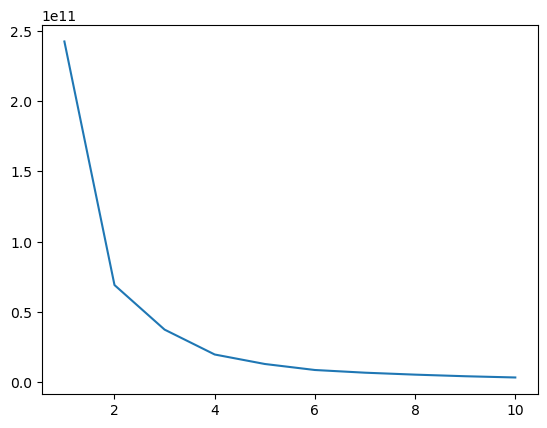

In [16]:
#WCSS değerleri
sonuclar=[]

for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X) 
    sonuclar.append(kmeans.inertia_) 

plt.plot(range(1,11),sonuclar)

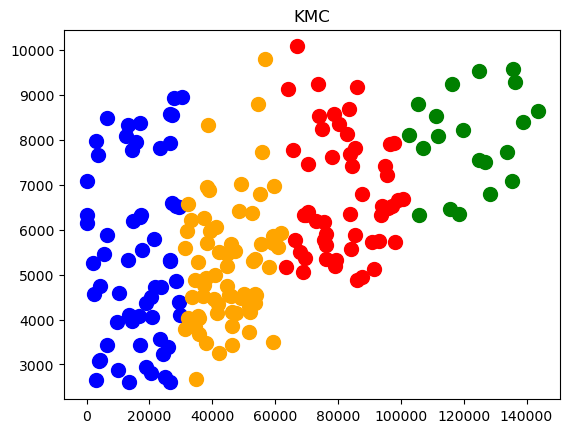

In [25]:
# grafiğe göre 4 daha iyiymiş
kmeans = KMeans( n_clusters = 4, init = 'k-means++')
Y_pred=kmeans.fit_predict(X)
plt.scatter(X[Y_pred==0,0] ,X[Y_pred==0,1],s=100, c='red')
plt.scatter(X[Y_pred==1,0],X[Y_pred==1,1],s=100, c='blue')
plt.scatter(X[Y_pred==2,0],X[Y_pred==2,1],s=100, c='green') 
plt.scatter(X[Y_pred==3,0],X[Y_pred==3,1],s=100, c='orange') 
plt.title("KMC")
plt. show()




# HİYERARŞİK

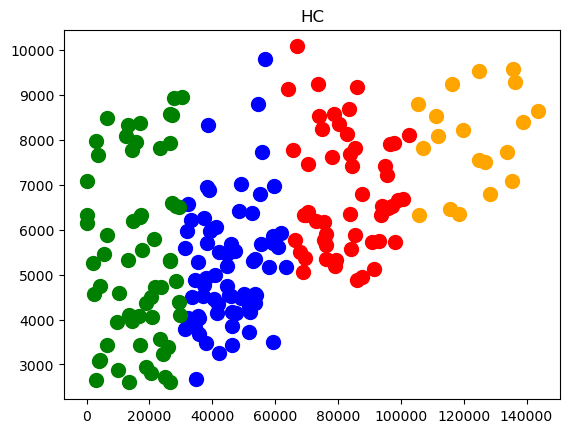

In [26]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage="ward")
Y_tahmin = ac.fit_predict(X)

plt.scatter(X[Y_tahmin==0,0] ,X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green') 
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='orange') 
plt.title("HC")
plt. show()



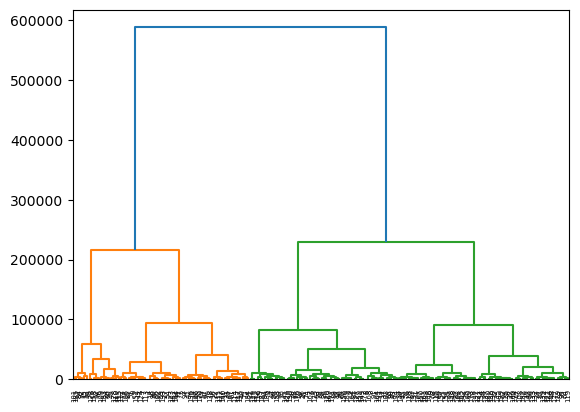

In [27]:
#dendogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

<span style="color:red;font-size:30pt">BİRLİKTELİK KURAL ÇIKARIMI-ARM<br><br> </span>
<span style="color:red;font-size:30pt">(Association Rule Mining)</span>


# APRİORİ


In [32]:
datas=data=pd.read_csv("C:/Users/bedir/Downloads/sepet.csv",header=None)

In [35]:
t=[]

for i in range(0,7501):
    t.append( [str(datas.values[i,j]) for j in range (0,20)])


In [29]:
from apyori import apriori

In [39]:
rules=apriori(t,min_support=0.01, min_confidence=0.2, min_lift = 3,min_length=2)
rules_list=list(rules)
rules_list

[RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'herb & pepper', 'nan', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'nan', 'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285), OrderedStatistic(items_base=frozenset({'nan', 'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])]

<span style="color:red;font-size:30pt">PEKİŞTİRMELİ ÖĞRENME-LR<br><br></span>
<span style="color:red;font-size:30pt">(REİNFORCED LEARNİNG)</span>



In [10]:

datas=pd.read_csv("C:/Users/bedir/Downloads/ads_CTR_optimisation.csv")
datas

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# RANDOM SELECTİON

In [16]:
import random

N = 10000 
toplam=0
d=10
secilenler=[]
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = datas.values[n,ad] 
    toplam = toplam + odul
print("toplam:",toplam)

toplam: 1226


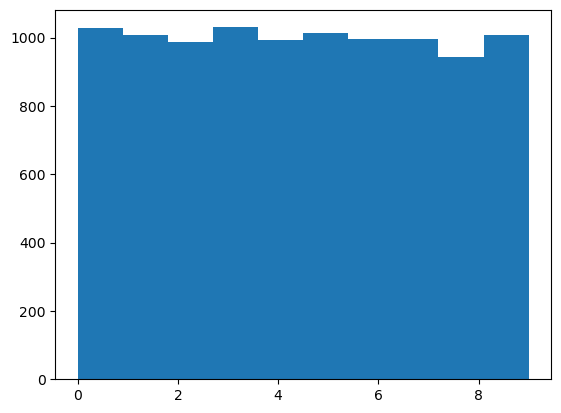

In [17]:
plt.hist(secilenler)
plt.show()

# Ust Guven Sınırı (Upper Confidence Boun, UCB)

![UCB](UCB.jpeg)

Toplam Odul:
2231


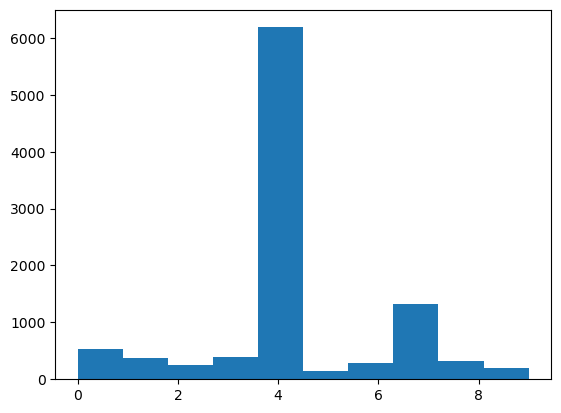

In [24]:
import math
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(n)
oduller = [0] * d #ilk basta butun ilanların odulu 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam odul
secilenler = []
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = datas.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

plt.hist(secilenler)
plt.show()

# THOMPSON 

 ![THOMPSON](THOMPSON.jpeg)

Toplam Odul:
2604


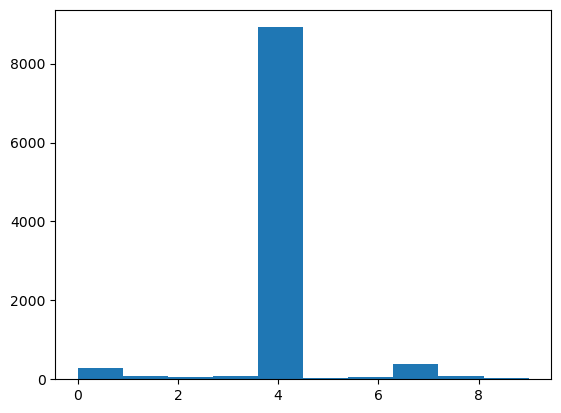

In [27]:
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
toplam = 0 # toplam odul
secilenler = []
#Ni1(n)
birler = [0] * d
#Ni0(n)
sifirlar = [0] * d
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_th = 0
    for i in range(0,d):
        rasbeta = random.betavariate ( birler[i] + 1 , sifirlar[i] +1)
        if rasbeta > max_th:
            max_th = rasbeta
            ad = i
    secilenler.append(ad)
    odul = datas.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    if odul == 1:
        birler[ad] = birler[ad]+1
    else :
        sifirlar[ad] = sifirlar[ad] + 1
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

plt.hist(secilenler)
plt.show()